In [1]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree , svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터를 읽어오기
digits = datasets.load_digits()

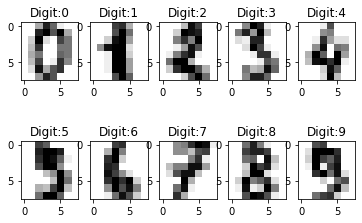

In [2]:
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5, label+1)
    plt.imshow(img, cmap = plt.cm. gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))
plt.show()

In [4]:
img, img.shape, label

(array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8),
 9)

In [6]:
images = digits.images
labels = digits.target

In [11]:
# 차원 축소 --> 왜? 벡터값을 넣어야 하니까

images = images.reshape(images.shape[0], -1)
images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# 서포트 벡터머신 모델 생성

In [12]:
len(images)

1797

In [13]:
n_samples = len(images)
train_size = int(n_samples*(2/3)) # 전체의 2/3 train set으로 활용

In [16]:
# c값이 커지면 정규화가 낮다 --> 일반화가 잘 안된다 / 얼마나 오차를 허용하냐
classifier = svm.SVC(C=1.0, gamma = 0.001)
classifier.fit(images[:train_size], labels[:train_size])

SVC(gamma=0.001)

In [22]:
expected = labels[train_size:]
pred = classifier.predict(images[train_size:])

In [24]:
# 모델 평가

print("정확도\n", accuracy_score(expected, pred))
print()
print("혼동행렬\n", confusion_matrix(expected, pred))

# 결과 해석
# 정확도 96%
# 

정확도
 0.9632721202003339

혼동행렬
 [[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  0  0  0 54  0]
 [ 0  0  0  1  0  1  0  0  0 56]]


## 유방암 데이터

In [25]:
from sklearn import datasets 
from sklearn import svm
from sklearn import metrics

import numpy as np
import pandas as pd

# 유방암 환자 데이터 로딩

cancer = datasets.load_breast_cancer()

In [27]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [28]:
# 13개의 특징 정보 (feature)

print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
# label type of cancer (악성 또는 양성)

print(cancer.target_names)

['malignant' 'benign']


In [30]:
cancer.data.shape

(569, 30)

In [31]:
cancer.target.shape

(569,)

In [32]:
from sklearn.model_selection import train_test_split

# 7:3 데이터 분할 학습 : 테스트

train_X, test_X, train_Y, test_Y = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [33]:
train_X, train_Y

(array([[1.374e+01, 1.791e+01, 8.812e+01, ..., 6.019e-02, 2.350e-01,
         7.014e-02],
        [1.337e+01, 1.639e+01, 8.610e+01, ..., 8.978e-02, 2.048e-01,
         7.628e-02],
        [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
         9.208e-02],
        ...,
        [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
         6.120e-02],
        [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
         1.055e-01],
        [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
         6.878e-02]]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
 

In [36]:
# 문제 1
# 위 데이터 기반, svm 모델을 만들어 보세요 
# 커널 함수는 선형으로 사용 
# 모델 이름 : clf
# 모델 학습

clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y)

SVC(kernel='linear')

In [41]:
# 문제 2
# 모델 훈련 했나요? 예측해 보세요
y_pred = clf.predict(test_X)
y_pred, test_Y

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1

In [42]:
# 모델 평가

print("정확도\n", accuracy_score(test_Y, y_pred))
print()
print("혼동행렬\n", confusion_matrix(test_Y, y_pred))

정확도
 0.9649122807017544

혼동행렬
 [[ 59   4]
 [  2 106]]


In [43]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

